In [1]:
# Import Libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [2]:
Data = pd.read_excel("Dataset.xlsx")

Data.head(5)

,Sentiment,Student Reviews & Comments,Challenges & Issues,Source,Language,Sentiment Target Class
0,Negative,The university should'nt play with the careers...,# Internet Issue\n#Proper Resources Issue,Facebook,English,1.0
1,Negative,Examinations decision is a ridiculous decision...,#Examination issue due to poor internet conne...,Facebook,English,1.0
2,Negative,No gaining in online classes,NaN,Facebook,English,1.0
3,Negative,Not reliable at all,NaN,Facebook,English,1.0
4,Negative,Nonsense,NaN,Facebook,English,1.0


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106 entries, 0 to 4105
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sentiment                   4103 non-null   object 
 1   Student Reviews & Comments  4106 non-null   object 
 2   Challenges & Issues         2003 non-null   object 
 3   Source                      4106 non-null   object 
 4   Language                    4104 non-null   object 
 5   Sentiment Target Class      4103 non-null   float64
dtypes: float64(1), object(5)
memory usage: 192.6+ KB


In [4]:
Data.isnull().sum()

Sentiment                        3
Student Reviews & Comments       0
Challenges & Issues           2103
Source                           0
Language                         2
Sentiment Target Class           3
dtype: int64

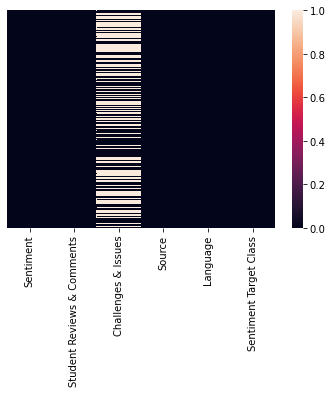

In [5]:
sns.heatmap(Data.isnull(),  yticklabels=False)

In [6]:
# Data Pre-Processing
Data.isnull().sum()

Sentiment                        3
Student Reviews & Comments       0
Challenges & Issues           2103
Source                           0
Language                         2
Sentiment Target Class           3
dtype: int64

In [7]:
Data = Data.fillna(0)


In [8]:
Data.head(5)

,Sentiment,Student Reviews & Comments,Challenges & Issues,Source,Language,Sentiment Target Class
0,Negative,The university should'nt play with the careers...,# Internet Issue\n#Proper Resources Issue,Facebook,English,1.0
1,Negative,Examinations decision is a ridiculous decision...,#Examination issue due to poor internet conne...,Facebook,English,1.0
2,Negative,No gaining in online classes,0,Facebook,English,1.0
3,Negative,Not reliable at all,0,Facebook,English,1.0
4,Negative,Nonsense,0,Facebook,English,1.0


In [9]:
Data.isnull().sum()

Sentiment                     0
Student Reviews & Comments    0
Challenges & Issues           0
Source                        0
Language                      0
Sentiment Target Class        0
dtype: int64

Negative    2877
Neutral     1053
Positive     172
0              3
neutral        1
Name: Sentiment, dtype: int64

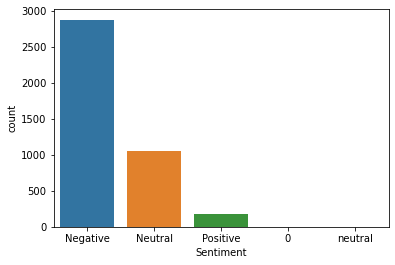

In [10]:
sns.countplot(x = "Sentiment", data = Data)
Data["Sentiment"].value_counts()

Youtube     1850
Facebook    1257
Twitter      999
Name: Source, dtype: int64

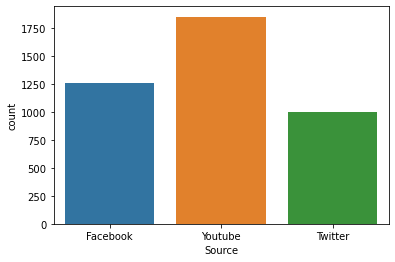

In [11]:
sns.countplot(x = "Source", data = Data)
Data["Source"].value_counts()

English                    3223
Mix(Roman Urdu+English)     744
Mix(English+Roman Urdu)     113
Roman Urdu                   18
Roman urdu                    4
Roman  urdu                   2
0                             2
Name: Language, dtype: int64

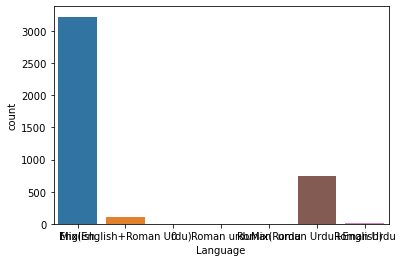

In [12]:
sns.countplot(x = "Language", data = Data)
Data["Language"].value_counts()

In [13]:
#remove unwanted column from the data 
del Data['Student Reviews & Comments']
del Data['Challenges & Issues']


In [14]:
Data.head(5)

,Sentiment,Source,Language,Sentiment Target Class
0,Negative,Facebook,English,1.0
1,Negative,Facebook,English,1.0
2,Negative,Facebook,English,1.0
3,Negative,Facebook,English,1.0
4,Negative,Facebook,English,1.0


In [ ]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

In [16]:
# We would like to remove all stop words like a, is, an, the, ... 
# so we collecting all of them from nltk library
stop_words = set(stopwords.words('english'))

In [17]:
def data_text_preprocess(Data, ind, col):
    # Remove int values from text data as that might not be imp
    if type(Data) is not int:
        string = ""
        # replacing all special char with space
        Data = re.sub('[^a-zA-Z0-9\n]', ' ', str(Data))
        # replacing multiple spaces with single space
        Data = re.sub('\s+',' ', str(Data))
        # bring whole text to same lower-case scale.
        Data = Data.lower()
        
        for word in Data.split():
        # if the word is a not a stop word then retain that word from text
            if not word in stop_words:
                string += word + " "
        
        Data[col][ind] = string

In [18]:
Data.head(5)

,Sentiment,Source,Language,Sentiment Target Class
0,Negative,Facebook,English,1.0
1,Negative,Facebook,English,1.0
2,Negative,Facebook,English,1.0
3,Negative,Facebook,English,1.0
4,Negative,Facebook,English,1.0


In [19]:
Data = pd.get_dummies(Data,drop_first=True)

In [20]:
Data.head(5)

,Sentiment Target Class,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive,Sentiment_neutral,Source_Twitter,Source_Youtube,Language_English,Language_Mix(English+Roman Urdu),Language_Mix(Roman Urdu+English),Language_Roman urdu,Language_Roman Urdu,Language_Roman urdu
0,1.0,1,0,0,0,0,0,1,0,0,0,0,0
1,1.0,1,0,0,0,0,0,1,0,0,0,0,0
2,1.0,1,0,0,0,0,0,1,0,0,0,0,0
3,1.0,1,0,0,0,0,0,1,0,0,0,0,0
4,1.0,1,0,0,0,0,0,1,0,0,0,0,0


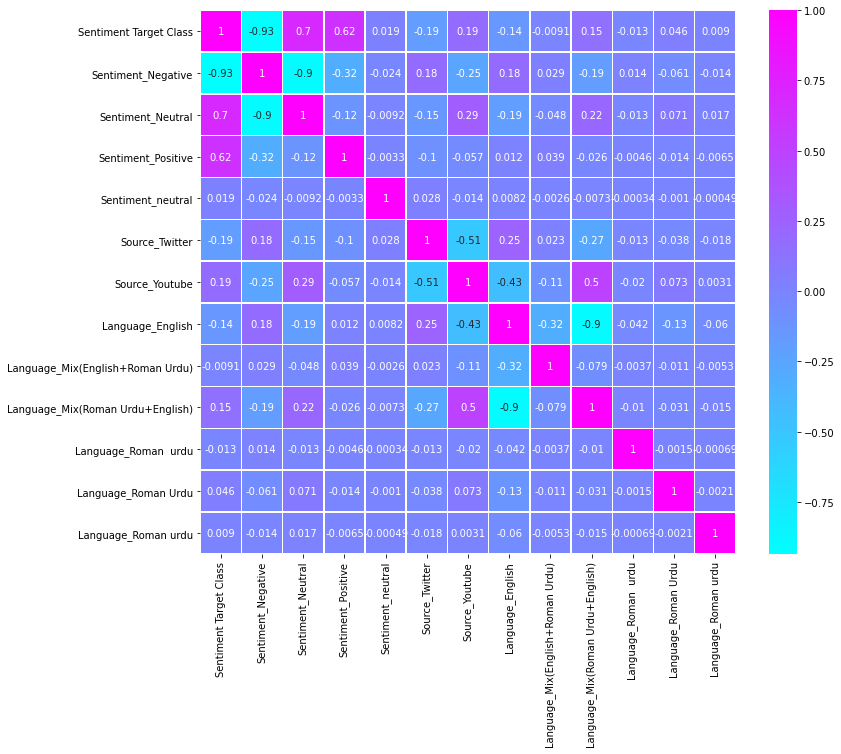

In [21]:
plt.figure(figsize = (12, 10))
sns.heatmap(Data.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

In [22]:
# Data Spliting

x= Data.drop("Sentiment Target Class",axis=1)
y= Data["Sentiment Target Class"]

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=0)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler_object = MinMaxScaler()
scaler_object.fit(X_train)
MinMaxScaler(copy=True, feature_range=(0, 1))
scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

In [26]:
from sklearn.svm import SVC


In [27]:
Classifier_1=SVC(kernel="linear", random_state=0)



In [28]:
Classifier_1.fit(X_train,y_train)


SVC(kernel='linear', random_state=0)

In [29]:
Predict_1 = Classifier_1.predict(X_test)

In [30]:
from sklearn.metrics import classification_report


In [31]:
print(classification_report(y_test,Predict_1))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       1.00      1.00      1.00       835
         2.0       1.00      1.00      1.00       332
         3.0       0.95      1.00      0.98        63

    accuracy                           1.00      1232
   macro avg       0.74      0.75      0.74      1232
weighted avg       1.00      1.00      1.00      1232



C:\Users\Fida Muhammad Khan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import confusion_matrix


In [33]:
print(confusion_matrix(y_test,Predict_1))


[[  0   0   0   2]
 [  0 835   0   0]
 [  0   0 331   1]
 [  0   0   0  63]]


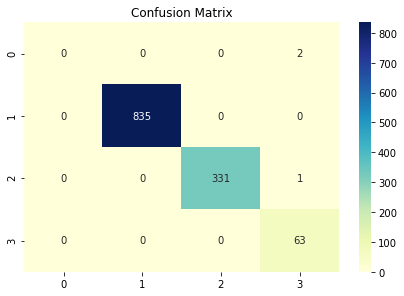

In [34]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,Predict_1)), annot= True, cmap="YlGnBu" ,fmt="g")
plt.tight_layout()
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel = ("Actual Labels")
plt.xlabel = ("Predicted Labels")
plt.show()

In [35]:
from sklearn.metrics import accuracy_score


In [36]:
print(accuracy_score(y_test,Predict_1))


0.997564935064935


In [37]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,Predict_1))


print("Train set score: {:.2f}".format(Classifier_1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(Classifier_1.score(X_test, y_test)))

0.997564935064935
Train set score: 1.00
Test set score: 1.00


In [38]:
df = Predict_1


In [39]:
df = pd.DataFrame(df)

In [40]:
df.head(5)

,0
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [41]:
df.rename(columns={0: "Predicted Sentiment based on Issues"}, inplace=True)

1.0    835
2.0    331
3.0     66
Name: Predicted Sentiment based on Issues, dtype: int64

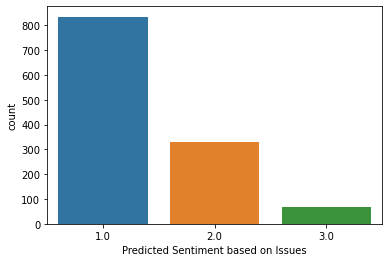

In [42]:
sns.countplot(x = "Predicted Sentiment based on Issues", data = df)
df["Predicted Sentiment based on Issues"].value_counts()